# Stochastic Simulation -- Asignment 2
## Walter Vianen -- 11811293
## Daan van Ingen -- 10345078

In [1]:
import random
import simpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Source(object):
    ''' Generate the customers comming into the system with some exponetially distributed interval time.
    '''
    def __init__(self, env, numCustomers, interval, serveTime, server):
        self.env = env
        self.numCustomers = numCustomers
        self.interval = interval
        self.serveTime = serveTime
        self.server = server
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create n customers and timeout after each creation
        '''
        for i in range(1, self.numCustomers+1):
            customer = Customer(self.env, i, self.server, self.serveTime)
            timeUntillNext = random.expovariate(1. / self.interval)
            yield self.env.timeout(timeUntillNext)

class Customer(object):
    ''' Customers request the passed resource if they can make use of an open service.
        They are then served which takes some exponentially distributed time.
    '''
    def __init__(self, env, number, server, serveTime):
        self.env = env
        self.number = number
        self.server = server
        self.serveTime = serveTime
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create a service request and use it once it becomes available
        '''
        arrival = self.env.now
#         print('customer %d starts at %d' % (self.number, self.env.now))
        with self.server.request() as req:
            yield req
            results.append(self.env.now-arrival)
#             print('customer %d served at %d' % (self.number, self.env.now))
            yield self.env.timeout(random.expovariate(1./self.serveTime))
#             print('customer %d done at %d' % (self.number, self.env.now))

## Start-up Time

In [ ]:
SEED = 9999
random.seed(SEED)

customers = 2000
capacity = [1,2,4]
reps = 1000
serviceTimes = 9
arrival = 10.
plt.figure(figsize=(10,6))
colors = ['blue', 'orange', 'green']
j = 0
for cap in capacity:
    totalResults = np.zeros((reps, customers))
    means, std = [], []
    newArrival = arrival/cap
    #print(newArrival, service_time, cap)
    i = 0
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = Source(env, customers, newArrival, serviceTimes, server)
        env.run()
        totalResults[i, :] = results
        i += 1
    plot_results = np.zeros(customers)
    plot_stds = np.zeros(customers)
    for k in range(customers): 
        plot_results[k] = np.mean(totalResults[:, k])
        plot_stds[k] = np.std(totalResults[:, k])       
    plt.plot(np.arange(0, len(plot_results), 1), plot_results, color=colors[j], label='servers = %d'%cap)
    plt.fill_between(np.arange(0, len(plot_results), 1), plot_results+1.96*plot_stds/np.sqrt(reps), plot_results-1.96*plot_stds/np.sqrt(reps), color=colors[j], alpha=0.15, linewidth=0)
    j += 1

plt.legend()
plt.xlabel('Customer Number')
plt.ylabel('Mean Waiting Time')
plt.show()

## Dependence on Rho

In [ ]:
SEED = 9999
random.seed(SEED)

customers = 2000
capacity = [1,2,4]
reps = 100
serviceTimes = [9., 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 9.999]
arrival = 10.
all_means = np.zeros((3, len(serviceTimes)))
all_stds = np.zeros((3, len(serviceTimes)))
plt.figure(figsize=(10,6))
i = 0
for cap in capacity:
    j = 0
    for service_time in serviceTimes:
        means, std = [], []
        totalResults = []
        newArrival = arrival/cap
        #print(newArrival, service_time, cap)
        for _ in range(reps):
            results = []
            env = simpy.Environment()
            server = simpy.Resource(env, capacity=cap)
            source = Source(env, customers, newArrival, service_time, server)
            env.run()
            totalResults.append(np.mean(results[500:]))
        all_means[i, j] = np.mean(totalResults)
        all_stds[i, j] = np.std(totalResults)
        j += 1
    i += 1
    
plt.plot(np.array(serviceTimes)/10, all_means[0, :], color='blue', label='servers = 1')
plt.fill_between(np.array(serviceTimes)/10, all_means[0, :]-1.96*all_stds[0,:]/np.sqrt(reps), all_means[0, :]+1.96*all_stds[0,:]/np.sqrt(reps), color='blue', alpha=0.15, linewidth=0)
plt.plot(np.array(serviceTimes)/10, all_means[1, :], color='orange', label='servers = 2')
plt.fill_between(np.array(serviceTimes)/10, all_means[1, :]-1.96*all_stds[1,:]/np.sqrt(reps), all_means[1, :]+1.96*all_stds[1,:]/np.sqrt(reps), color='orange', alpha=0.15, linewidth=0)
plt.plot(np.array(serviceTimes)/10, all_means[2, :], color='green', label='servers = 4')
plt.fill_between(np.array(serviceTimes)/10, all_means[2, :]-1.96*all_stds[2,:]/np.sqrt(reps), all_means[2, :]+1.96*all_stds[2,:]/np.sqrt(reps), color='green', alpha=0.15, linewidth=0)
plt.legend()
plt.xlabel('Rho')
plt.ylabel('Mean Waiting Time')
plt.show()

## Mean Waiting Time Distribution

10.0 9.0 1
5.0 9.0 2
2.5 9.0 4


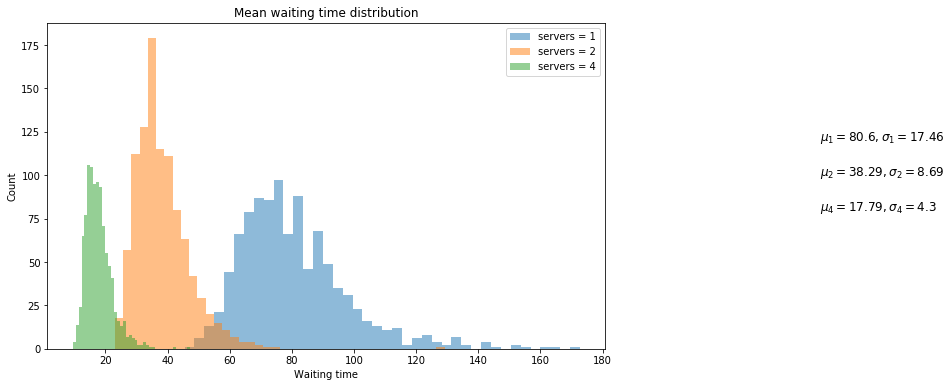

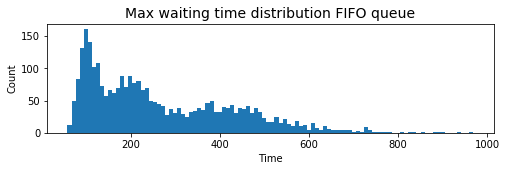

In [15]:
SEED = 9999
random.seed(SEED)

customers = 10000
capacity = [1,2,4]
reps = 1000
serviceTime = 9.0
arrival = 10.
means, std, maxwait = [], [], []
plt.figure(figsize=(10,6))
for cap in capacity:
    totalResults = []
    newArrival = arrival/cap
    print(newArrival, serviceTime, cap)
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = Source(env, customers, newArrival, serviceTime, server)
        env.run()
        totalResults.append(np.mean(results[500:]))
        maxwait.append(np.max(results[500:]))
    means.append(np.mean(totalResults))
    std.append(np.std(totalResults))
    plt.hist(totalResults, bins=40, alpha=0.5, label="servers = " + str(cap))
#     plt.plot([means[-1], means[-1]], [0, 50], scaley=False, linestyle="--", label="mean n=" + str(cap))

plt.legend(loc=1)
plt.title("Mean waiting time distribution")
plt.xlabel("Waiting time")
plt.ylabel("Count")
plt.text(250, 120, "$\mu_1="+str(round(means[0], 2))+", \sigma_1="+str(round(std[0], 2))+"$", fontsize=12)
plt.text(250, 100, "$\mu_2="+str(round(means[1], 2))+", \sigma_2="+str(round(std[1], 2))+"$", fontsize=12)
plt.text(250, 80, "$\mu_4="+str(round(means[2], 2))+", \sigma_4="+str(round(std[2], 2))+"$", fontsize=12)
plt.show()

plt.figure(figsize=(8,2))
plt.title("Max waiting time distribution FIFO queue", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Count")
plt.hist(maxwait, bins=100)
plt.show()

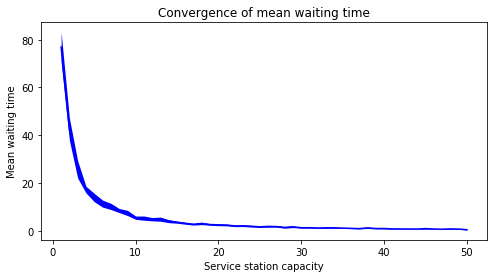

In [4]:
SEED = 9999
random.seed(SEED)

customers = 2000
capacity = np.linspace(1, 50, 50)
reps = 100
serviceTime = 9.0
arrival = 10.
means = []
stds = []
for cap in capacity:
    temp = []
    for _ in range(reps):
        newArrival = arrival/cap
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = Source(env, customers, newArrival, serviceTime, server)
        env.run()
        temp.append(np.mean(results[500:]))
    means.append(np.mean(temp))
    stds.append(np.std(temp))

plt.figure(figsize=(8,4))
plt.title("Convergence of mean waiting time")
plt.xlabel("Service station capacity")
plt.ylabel("Mean waiting time")
plt.plot(capacity, means, color='blue')
plt.fill_between(capacity, means+1.96*np.array(stds)/np.sqrt(reps), means-1.96*np.array(stds)/np.sqrt(reps), color='blue', alpha=0.15, linewidth=0)
plt.show()

# Shortest job first

10.0 9.0 1
5.0 9.0 2
2.5 9.0 4


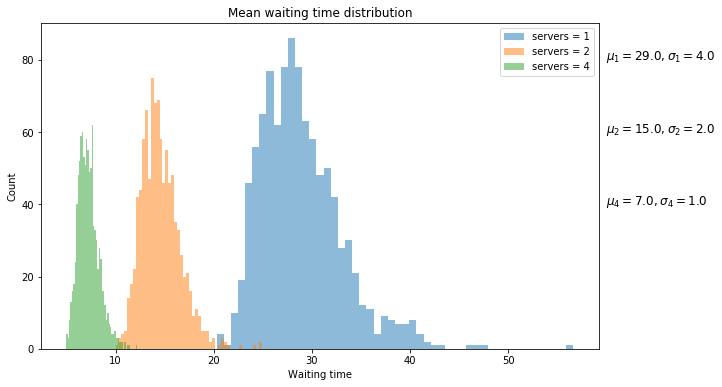

[28.886049148014962, 14.58075470427529, 7.232232370388255]


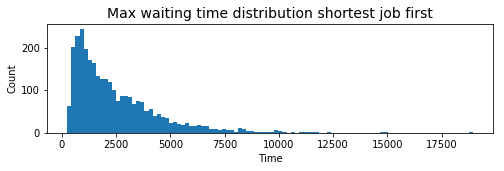

In [16]:
class sjf_Source(object):
    ''' Generate the customers comming into the system with some exponetially distributed interval time.
    '''
    def __init__(self, env, numCustomers, interval, serveTime, server):
        self.env = env
        self.numCustomers = numCustomers
        self.interval = interval
        self.serveTime = serveTime
        self.server = server
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create n customers and timeout after each creation
        '''
        for i in range(1, self.numCustomers+1):
            customer = sjf_Customer(self.env, i, self.server, self.serveTime)
            timeUntillNext = random.expovariate(1. / self.interval)
            yield self.env.timeout(timeUntillNext)

class sjf_Customer(object):
    ''' Customers request the passed resource if they can make use of an open service.
        They are then served which takes some exponentially distributed time.
    '''
    def __init__(self, env, number, server, serveTime):
        self.env = env
        self.number = number
        self.server = server
        self.serveTime = random.expovariate(1./serveTime)
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create a service request and use it once it becomes available
        '''
        arrival = self.env.now
        with self.server.request(priority=self.serveTime) as req:
            yield req
            results.append(self.env.now-arrival)
            yield self.env.timeout(self.serveTime)
#             print('customer %d done at %d' % (self.number, self.env.now))

SEED = 9999
random.seed(SEED)

customers = 10000
capacity = [1,2,4]
reps = 1000
serviceTime = 9.0
arrival = 10.
means, std, maxwait = [], [], []
plt.figure(figsize=(10,6))
for cap in capacity:
    totalResults = []
    newArrival = arrival/cap
    print(newArrival, serviceTime, cap)
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.PriorityResource(env, capacity=cap)
        source = sjf_Source(env, customers, newArrival, serviceTime, server)
        env.run()
        totalResults.append(np.mean(results[500:]))
        maxwait.append(np.max(results[500:]))
    means.append(np.mean(totalResults))
    std.append(np.std(totalResults))
    plt.hist(totalResults, bins=50, alpha=0.5, label="servers = " + str(cap))
#     plt.plot([means[-1], means[-1]], [0, 50], scaley=False, linestyle="--", label="mean n=" + str(cap))
plt.legend()
plt.title("Mean waiting time distribution")
plt.xlabel("Waiting time")
plt.ylabel("Count")
plt.text(60, 80, "$\mu_1="+str(round(means[0], 2))+", \sigma_1="+str(round(std[0], 2))+"$", fontsize=12)
plt.text(60, 60, "$\mu_2="+str(round(means[1], 2))+", \sigma_2="+str(round(std[1], 2))+"$", fontsize=12)
plt.text(60, 40, "$\mu_4="+str(round(means[2], 2))+", \sigma_4="+str(round(std[2], 2))+"$", fontsize=12)
plt.show()
print(means)

plt.figure(figsize=(8,2))
plt.title("Max waiting time distribution shortest job first", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Count")
plt.hist(maxwait, bins=100)
plt.show()

# M/D/n

10.0 9.0 1
5.0 9.0 2
2.5 9.0 4


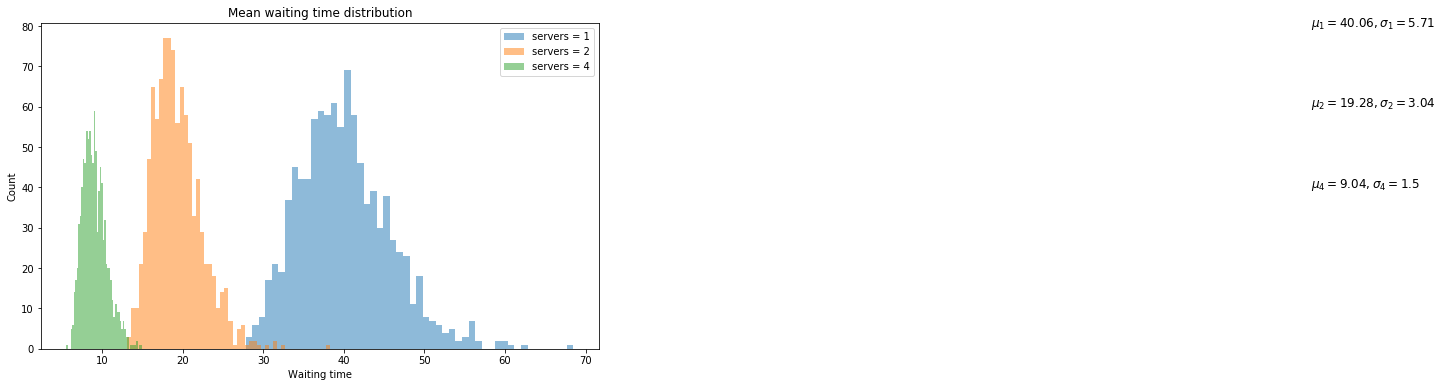

In [19]:
class md_Source(object):
    ''' Generate the customers comming into the system with some exponetially distributed interval time.
    '''
    def __init__(self, env, numCustomers, interval, serveTime, server):
        self.env = env
        self.numCustomers = numCustomers
        self.interval = interval
        self.serveTime = serveTime
        self.server = server
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create n customers and timeout after each creation
        '''
        for i in range(1, self.numCustomers+1):
            customer = md_Customer(self.env, i, self.server, self.serveTime)
            timeUntillNext = random.expovariate(1. / self.interval)
            yield self.env.timeout(timeUntillNext)

class md_Customer(object):
    ''' Customers request the passed resource if they can make use of an open service.
        They are then served which takes some exponentially distributed time.
    '''
    def __init__(self, env, number, server, serveTime):
        self.env = env
        self.number = number
        self.server = server
        self.serveTime = serveTime
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create a service request and use it once it becomes available
        '''
        arrival = self.env.now
#         print('customer %d starts at %d' % (self.number, self.env.now))
        with self.server.request() as req:
            yield req
            results.append(self.env.now-arrival)
#             print('customer %d served at %d' % (self.number, self.env.now))
            yield self.env.timeout(self.serveTime)
#             print('customer %d done at %d' % (self.number, self.env.now))

customers = 10000
capacity = [1,2,4]
reps = 1000
rho = 0.9
serviceTime = 9.0
arrival = 10.0
means = []
std = []
plt.figure(figsize=(10,6))
for cap in capacity:
    totalResults = []
    newArrival = arrival/cap
    print(newArrival, serviceTime, cap)
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = md_Source(env, customers, newArrival, serviceTime, server)
        env.run()
        totalResults.append(np.mean(results[500:]))
    means.append(np.mean(totalResults))
    std.append(np.std(totalResults))
    plt.hist(totalResults, bins=50, alpha=0.5, label="servers = " + str(cap))
#     plt.plot([means[-1], means[-1]], [0, 50], scaley=False, linestyle="--", label="mean n=" + str(cap))

plt.legend()
plt.title("Mean waiting time distribution")
plt.xlabel("Waiting time")
plt.ylabel("Count")
plt.text(160, 80, "$\mu_1="+str(round(means[0], 2))+", \sigma_1="+str(round(std[0], 2))+"$", fontsize=12)
plt.text(160, 60, "$\mu_2="+str(round(means[1], 2))+", \sigma_2="+str(round(std[1], 2))+"$", fontsize=12)
plt.text(160, 40, "$\mu_4="+str(round(means[2], 2))+", \sigma_4="+str(round(std[2], 2))+"$", fontsize=12)
plt.show()

## Long-Tail Distribution

5.0 9.0 1
2.5 9.0 2
1.25 9.0 4


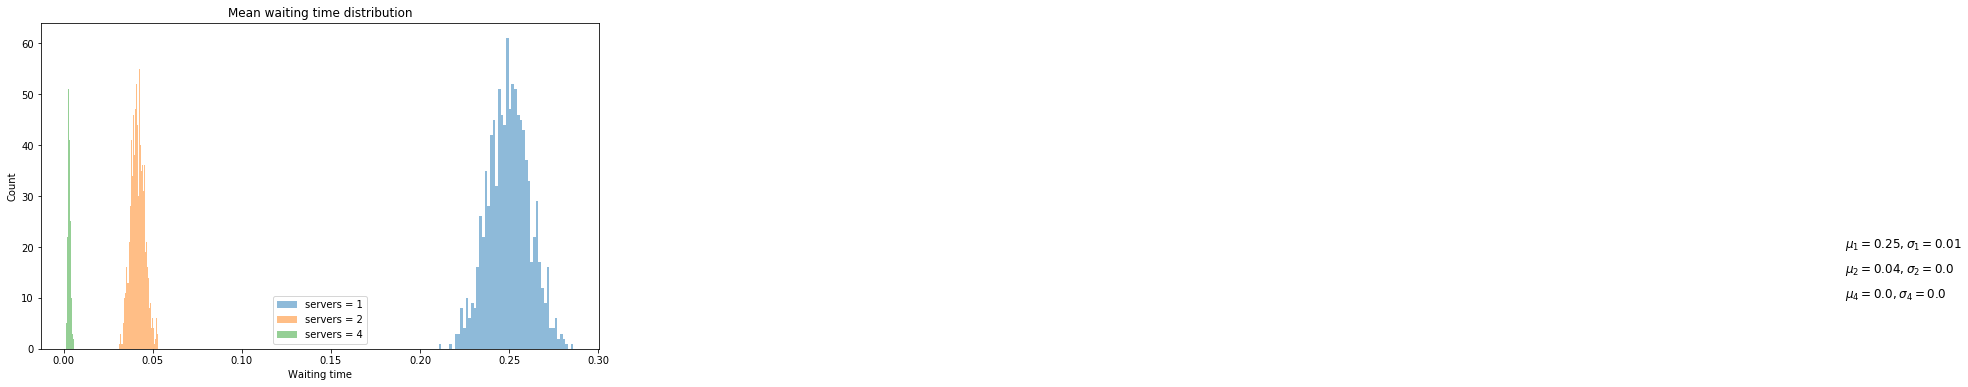

In [14]:
class lt_Source(object):
    ''' Generate the customers comming into the system with some exponetially distributed interval time.
    '''
    def __init__(self, env, numCustomers, interval, serveTime, server):
        self.env = env
        self.numCustomers = numCustomers
        self.interval = interval
        self.serveTime = serveTime
        self.server = server
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create n customers and timeout after each creation
        '''
        for i in range(1, self.numCustomers+1):
            customer = lt_Customer(self.env, i, self.server, self.serveTime)
            timeUntillNext = random.expovariate(1. / self.interval)
            yield self.env.timeout(timeUntillNext)

class lt_Customer(object):
    ''' Customers request the passed resource if they can make use of an open service.
        They are then served which takes some exponentially distributed time.
    '''
    def __init__(self, env, number, server, serveTime):
        self.env = env
        self.number = number
        self.server = server
        self.serveTime = serveTime
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create a service request and use it once it becomes available
        '''
        arrival = self.env.now
#         print('customer %d starts at %d' % (self.number, self.env.now))
        with self.server.request() as req:
            yield req
            results.append(self.env.now-arrival)
#             print('customer %d served at %d' % (self.number, self.env.now))

            if random.random() < 0.75:
                self.serveTime = random.expovariate(1. / 1)
            else: 
                self.serveTime = random.expovariate(1. / 5)


            yield self.env.timeout(self.serveTime)
#             print('customer %d done at %d' % (self.number, self.env.now))


customers = 10000
capacity = [1,2,4]
reps = 1000
rho = 0.9
serviceTime = 9.0
arrival = 5.
means = []
std = []
plt.figure(figsize=(10,6))
for cap in capacity:
    totalResults = []
    newArrival = arrival/cap
    print(newArrival, serviceTime, cap)
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = lt_Source(env, customers, newArrival, serviceTime, server)
        env.run()
        totalResults.append(np.mean(results[500:]))
    means.append(np.mean(totalResults))
    std.append(np.std(totalResults))
    plt.hist(totalResults, bins=50, alpha=0.5, label="servers = " + str(cap))
#     plt.plot([means[-1], means[-1]], [0, 50], scaley=False, linestyle="--", label="mean n=" + str(cap))

plt.legend()
plt.title("Mean waiting time distribution")
plt.xlabel("Waiting time")
plt.ylabel("Count")
plt.text(1, 20, "$\mu_1="+str(round(means[0], 2))+", \sigma_1="+str(round(std[0], 2))+"$", fontsize=12)
plt.text(1, 15, "$\mu_2="+str(round(means[1], 2))+", \sigma_2="+str(round(std[1], 2))+"$", fontsize=12)
plt.text(1, 10, "$\mu_4="+str(round(means[2], 2))+", \sigma_4="+str(round(std[2], 2))+"$", fontsize=12)
plt.show()